# Introducción a la Inteligencia Artificial - CEIA Coh17 (UBA)

Integrantes:

Agustín de la Vega (delavega.agus@gmail.com)

Florentino Arias (florito.arias@gmail.com)

Agustina Quiros (agustinaqr@gmail.com)

Matías Cardozo Pittana (cardozo.matiasp@gmail.com)

Paola Cartalá (paola.cartala@gmail.com)


# California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

Target
- `MedHouseVal`: Mediana del costo de casas en el bloque (en unidades de a $100.000)

Tareas y preguntas a resolver:

1. Obtener la correlación entre los atributos y los atributos con el target. ¿Cuál atributo tiene mayor correlación lineal con el target y cuáles atributos parecen estar más correlacionados entre sí? Se puede obtener los valores o directamente graficar usando un mapa de calor.
2. Graficar los histogramas de los diferentes atributos y el target. ¿Qué tipo de forma de histograma se observa? ¿Se observa alguna forma de campana que nos indique que los datos pueden provenir de una distribución gaussiana, sin entrar en pruebas de hipótesis?
3. Calcular la regresión lineal usando todos los atributos. Con el set de entrenamiento, calcular la varianza total del modelo y la que es explicada con el modelo. ¿El modelo está capturando el comportamiento del target? Expanda su respuesta.
4. Calcular las métricas de MSE, MAE y R2 del set de evaluación.
5. Crear una regresión de Ridge. Usando una validación cruzada de 5-folds y usando como métrica el MSE, calcular el mejor valor de α, buscando entre [0, 12.5]. Graficar el valor de MSE versus α
6. Comparar, entre la regresión lineal y la mejor regresión de Ridge, los resultados obtenidos en el set de evaluación. ¿Cuál da mejores resultados (usando MSE y MAE)? Conjeturar por qué el mejor modelo mejora. ¿Qué error puede haberse reducido?

In [ ]:
# Librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import KFold, train_test_split

sns.set()

In [ ]:
california_housing = fetch_california_housing()
# type(california_housing) sklearn.utils._bunch.Bunch
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

In [ ]:
# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [ ]:
df_california.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


**1. Correlación entre los atributos y los atributos con el target**

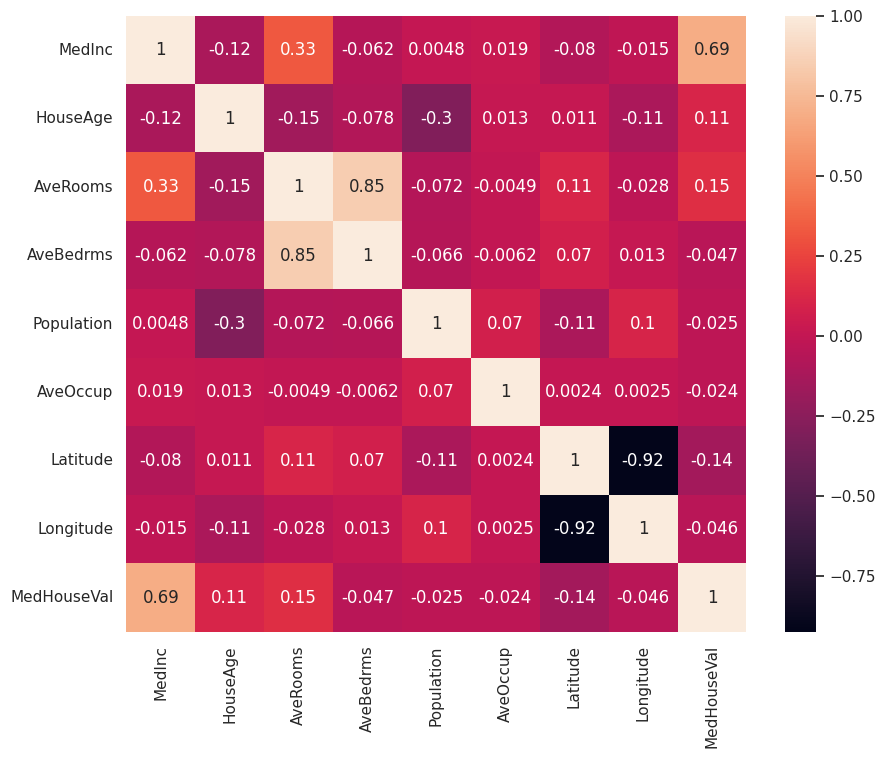

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df_california.corr(),
            xticklabels=df_california.corr().columns,
            yticklabels=df_california.corr().columns,
            annot=True)
plt.show()

El atributo que tiene mayor correlación (0.69) con el target es `MedInc` que nos indica el ingreso medio en el bloque.

Los atributos `AveRooms` y `AveBedrms` que indican número promedio de habitaciones por hogar y número promedio de dormitorios por hogar respectivamente, tienen una correlación alta (0.85) entre sí, esto nos indica que nos estan dando la misma información y podríamos considerar solo uno de ellos para futuras predicciones.

`Latitude` y `Longitude` cuentan con una correlación alta ya que se trata de una zona predefinida y, en dicha zona de california los valores de latitud son siempre positivos y los de longitud siempre negativos.

**2. Histogramas de los diferentes atributos y el target**

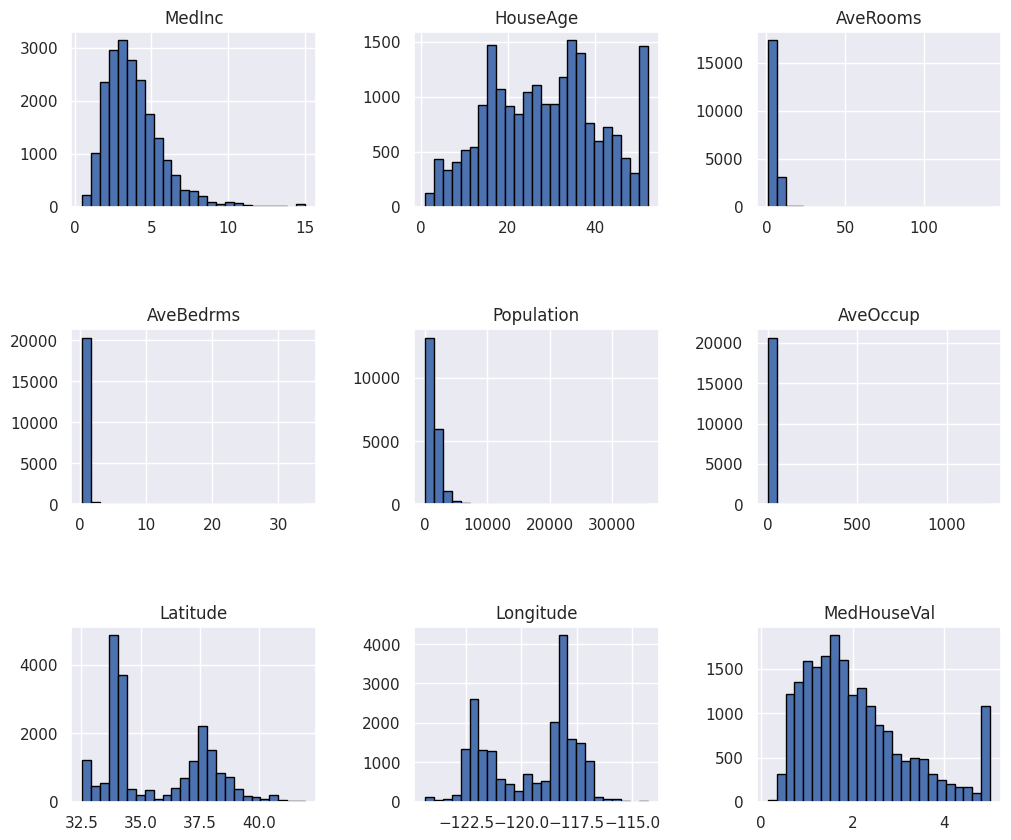

In [ ]:
df_california.hist(figsize=(12, 10), bins=25, edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)

*   `MedInc` tiene una distribución asimetrica a derecha, esto nos indica que, pocas familias tienen altos ingresos y por otro lado, la mayoría de las familias tienen un ingreso menor a $50.000.
*   `HouseAge` tiene una distribución mas o menos uniforme, de esto podemos observar que los años de las casas estan entre 20 y 40 sin haber un valor más frecuente.
*  El target `MedHouseVal` tiene una distribución levemente asimétrica a derecha. Es notorio que el valor 5 tiene alta frecuencia, de esto podríamos deducir puede haber una región geografica asociada a estos valores.
*   `Latitude` y `Longitude` cuentan ambas con distribuciones bimodales, lo que indica que hay zonas con mayor concentracion de bloques y por ende mayor edificacion. Las modas para la `Latitude` son 34 y 37.5 mientras que para `Longitude` son y -122.5 y -118. Estas coordenadas (37.5, -122.5) y (34, -118) corresponden a los centros San Francisco y Los Angeles respectivamente.
* Con respecto a `AveBedrms`, `AveRooms`, `Population`, `AveOccup` el rango de los datos queda muy grande para poder observar correctamente los valores, graficaremos cada una por separado para una mejor visualización y análisis.








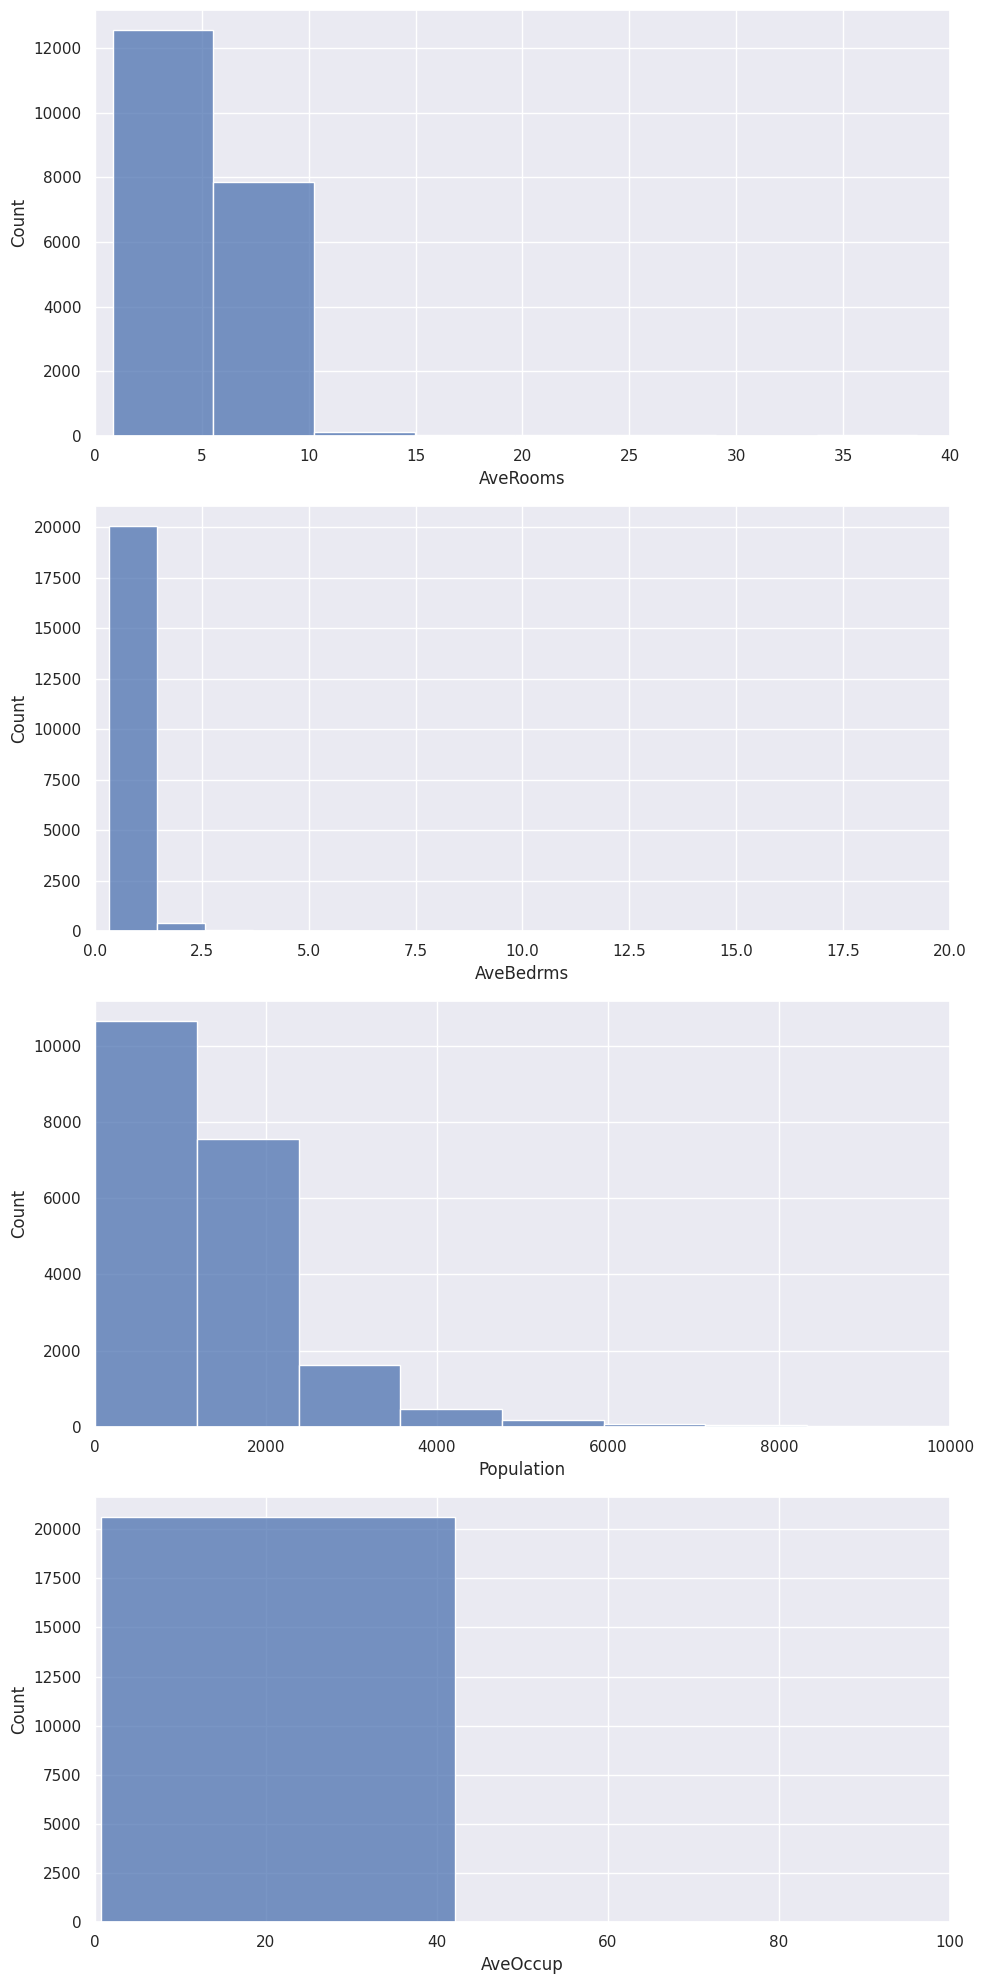

In [ ]:
variables = ["AveRooms", "AveBedrms", "Population", "AveOccup"]

x_limits = {
    "AveRooms": (0, 40),
    "AveBedrms": (0, 20),
    "Population": (0, 10000),
    "AveOccup": (0, 100)
}

fig, axes = plt.subplots(len(variables), 1, figsize=(10, 5 * len(variables)))


for var, ax in zip(variables, axes):
    sns.histplot(data=df_california, x=var, bins=30, ax=ax)
    ax.set_xlim(x_limits[var])
    #ax.set_title(f'{var}')

plt.tight_layout()
plt.show()

`AveRoom`, `AveRooms`, ` Population` tienen una distribución asimetrica a derecha.

Para el atributo AveRooms se observa que la mayoría tienen entre 0 y 5 habitaciones. Con respecto a AveBedrms la mayoría tiene entre 0 y 1 dormitorio.

Respecto al atributo Population vemos que la mayoría de los bloques tienen una población de 1.000 seguido de una población de 2.000.

El atributo `AveOccup` tiene una distribución uniforme y se observa que, el número promedio de miembros por hogar varía entre 0 y 40, de esto podríamos deducir que existen valores atípicos.


> Observando con mayor detalle los valores de las variables

In [ ]:
df_california[variables].describe()

,AveRooms,AveBedrms,Population,AveOccup
count,20640.000000,20640.000000,20640.000000,20640.000000
mean,5.429000,1.096675,1425.476744,3.070655
std,2.474173,0.473911,1132.462122,10.386050
min,0.846154,0.333333,3.000000,0.692308
25%,4.440716,1.006079,787.000000,2.429741
50%,5.229129,1.048780,1166.000000,2.818116
75%,6.052381,1.099526,1725.000000,3.282261
max,141.909091,34.066667,35682.000000,1243.333333


El valor máximo para cada una de las variables supera a tres desvíos estándar respecto de la media, siguiendo este criterio podemos confirmar que existen valores atípicos.

**3. Regresión Lineal**

In [ ]:
#Separamos los datos en entrenamiento y evaluacion
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)

scaler = StandardScaler()

#Escalamos los datos de cada variable removiendo la media y escalando en base a su varianza
X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = scaler.transform(X_test)

LR = LinearRegression()

LR.fit(X_train_scaled, Y_train)

Y_hat_train = LR.predict(X_train_scaled)

### La varianza total del modelo se puede calcular como:


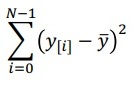

In [ ]:
Y_train_mean = np.mean(Y_train)
var_total_train = np.sum((Y_train - Y_train_mean)**2)

### La varianza que explica el modelo se puede calcular como:

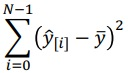

In [ ]:
var_explained_train = np.sum((Y_hat_train - Y_train_mean)**2)

print("La varianza total es: ", var_total_train)
print("La varianza explicada por el modelo es: ", var_explained_train)
print("El % de varianza explicado con respecto a la total es: ", int((var_explained_train/var_total_train)*100),"%")

La varianza total es:  22072.88183306702
La varianza explicada por el modelo es:  13520.770064403665
El % de varianza explicado con respecto a la total es:  61 %


El modelo está capturando el 61% del total de la varianza que posee la variable dependiente, es decir que los desvíos al cuadrado entre la media del valor real de ésta y la predicción (de cada observación) es mayor a los desvíos al cuadrado de cada observación comparado con su predicción. Esto supone que el modelo está captando de manera significativa el comportamiento de la variable target.
Sin embargo, el 39% restante de la varianza no es explicado por el modelo. Estas diferencias provienen de la distancia entre las predicciones del modelo y los valores reales de las observaciones, lo que puede deberse a varios factores externos, como por ejemplo errores en la medición o comportamiento no lineal de las variables independientes con la dependiente.

**4. Cálculo de Métricas de Evaluación**

Para validar si nuestro modelo está bien entrenado, usaremos las métricas de evaluación MSE (error cuadrático medio), MAE(error absoluto medio) y R2 (coeficiente de Pearson) de scikit-learn, aplicadas sobre el dataset de testeo.

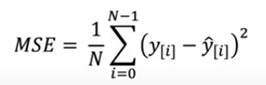

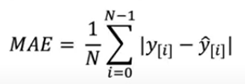

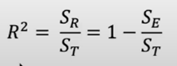


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

#Primero obtenemos las predicciones del modelo
y_pred_LR = LR.predict(X_test_scaled)

#MSE (error cuadrático medio)
mse = mean_squared_error(Y_test, y_pred_LR)

#MAE(error absoluto medio)
mae = mean_absolute_error(Y_test, y_pred_LR)

#R2 - coeficiente de Pearson:
r2 = r2_score(Y_test, y_pred_LR)

print("El Error Cuadratico Medio es:", mse)
print("El Error Absoluto Medio es:", mae)
print("El R-Cuadrado en test es:", r2)

El Error Cuadratico Medio es: 0.5388649914036732
El Error Absoluto Medio es: 0.5353166913867702
El R-Cuadrado en test es: 0.5887810596909611


**5. Regresión de Ridge**

Mejor α: 12.5
MSE para α 12.5 : 0.5304922875483845
R2 para α 12.5 : 0.6014390722146405
MAE para α 12.5 : 0.5316237821772387


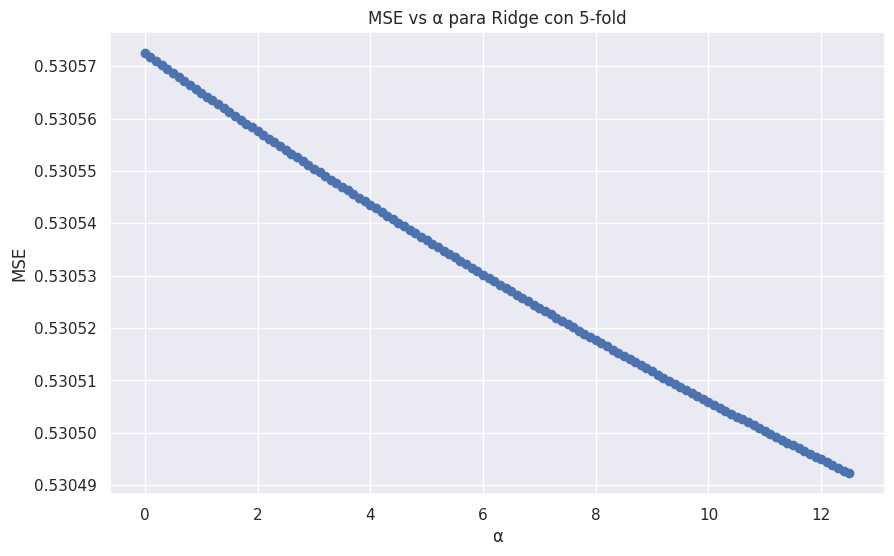

In [ ]:
alpha_range = np.linspace(0, 12.5, 126) # Un alpha cada 0.1

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mse_scores = []
r2_scores = []
mae_scores = []
ridge_scaler = StandardScaler()
X_scaled = ridge_scaler.fit_transform(X)

for alpha in alpha_range:
    ridge = Ridge(alpha=alpha)
    fold_mse = []
    fold_r2 = []
    fold_mae = []

    for train_index, test_index in kf.split(X_scaled):
        X_train_fold, X_test_fold = X_scaled[train_index], X_scaled[test_index]
        y_train_fold, y_test_fold = y[train_index], y[test_index]

        ridge.fit(X_train_fold, y_train_fold)
        y_pred = ridge.predict(X_test_fold)
        mse = mean_squared_error(y_test_fold, y_pred)
        r2 = r2_score(y_test_fold, y_pred)
        mae = mean_absolute_error(y_test_fold, y_pred)
        fold_mse.append(mse)
        fold_r2.append(r2)
        fold_mae.append(mae)

    # Errores medios se promedian por alpha
    mse_scores.append(np.mean(fold_mse))
    r2_scores.append(np.mean(fold_r2))
    mae_scores.append(np.mean(fold_mae))

# Minimo MSE
best_index = np.argmin(mse_scores)
best_alpha = alpha_range[best_index]
best_mse = mse_scores[best_index]
best_r2 = r2_scores[best_index]
best_mae = mae_scores[best_index]

# Minimo MSE
best_index = np.argmin(mse_scores)
best_alpha = alpha_range[best_index]
best_mse = mse_scores[best_index]
print(f"Mejor α: {best_alpha}")
print(f"MSE para α {best_alpha} : {best_mse}")
print(f"R2 para α {best_alpha} : {best_r2}")
print(f"MAE para α {best_alpha} : {best_mae}")

plt.figure(figsize=(10, 6))
plt.plot(alpha_range, mse_scores, marker='o')
plt.xlabel('α')
plt.ylabel('MSE')
plt.title('MSE vs α para Ridge con 5-fold')
plt.grid(True)
plt.show()

**6. Análisis de Resultados:**

**Comparación de Resultados**:
- **MSE**: El MSE es una medida de la magnitud de los errores de predicción del modelo. Representa la media de los errores al cuadrado entre los valores predichos y los valores reales. Un menor MSE indica que, en promedio, las predicciones del modelo están más cerca de los valores reales. La regresión Ridge tiene un MSE ligeramente menor (0.5304922875483845) en comparación con la regresión lineal (0.5388649914036732), lo que sugiere que sus predicciones son un poco más precisas.
- **MAE**: El MAE es la media de los errores absolutos entre los valores predichos y los valores reales. Es una métrica que mide la magnitud media de los errores en un conjunto de predicciones, sin considerar su dirección (no importa si el error es positivo o negativo). La regresión Ridge también tiene un MAE menor (0.5316237821772387) en comparación con la regresión lineal (0.5353166913867702). Un menor MAE indica que sus predicciones son, en promedio, más cercanas a los valores reales.
- **R²**: Es el porcentaje de la variación en la variable de respuesta que es explicado por un modelo lineal. La regresión Ridge tiene un R² mayor (0.6014390722146405) en comparación con la regresión lineal (0.5887810596909611). Un mayor R² indica que la regresión Ridge explica una mayor proporción de la variabilidad en los datos (60,14%) en comparación con la regresión lineal (58,87%), es decir, tiene una mejor capacidad de ajustarse a los datos.

**Mejor Modelo**: La regresión Ridge ofrece mejores resultados que la regresión lineal en términos de MSE, MAE y R². Esto sugiere que el modelo Ridge es más efectivo en capturar la relación entre los atributos y el target.

**Error Reducido**: La regularización en la regresión Ridge ayuda a reducir el error de varianza, lo que contribuye a un mejor rendimiento del modelo en datos no vistos. Al penalizar los coeficientes grandes, el modelo se vuelve menos complejo y menos propenso a sobreajustarse a los datos de entrenamiento.